## 1. a) Calculating the best number of layers

[I 2024-10-16 23:16:32,028] A new study created in memory with name: MLP - optimizing number of layers and nodes


[I 2024-10-16 23:16:33,797] Trial 0 finished with value: 0.8 and parameters: {'n_layers': 5, 'n_units_layer_0': 69, 'n_units_layer_1': 37, 'n_units_layer_2': 142, 'n_units_layer_3': 176, 'n_units_layer_4': 171}. Best is trial 0 with value: 0.8.
[I 2024-10-16 23:16:34,259] Trial 1 finished with value: 0.795 and parameters: {'n_layers': 1, 'n_units_layer_0': 106}. Best is trial 0 with value: 0.8.
[I 2024-10-16 23:16:34,949] Trial 2 finished with value: 0.805 and parameters: {'n_layers': 5, 'n_units_layer_0': 101, 'n_units_layer_1': 153, 'n_units_layer_2': 13, 'n_units_layer_3': 49, 'n_units_layer_4': 29}. Best is trial 2 with value: 0.805.
[I 2024-10-16 23:16:35,335] Trial 3 finished with value: 0.8 and parameters: {'n_layers': 1, 'n_units_layer_0': 157}. Best is trial 2 with value: 0.805.
[I 2024-10-16 23:16:36,065] Trial 4 finished with value: 0.795 and parameters: {'n_layers': 5, 'n_units_layer_0': 108, 'n_units_layer_1': 146, 'n_units_layer_2': 121, 'n_units_layer_3': 67, 'n_units_la

Best parameters: {'n_layers': 4, 'n_units_layer_0': 125, 'n_units_layer_1': 152, 'n_units_layer_2': 5, 'n_units_layer_3': 24}
Best accuracy (from optimization): 0.815
Results saved to 'optimization_results.csv'


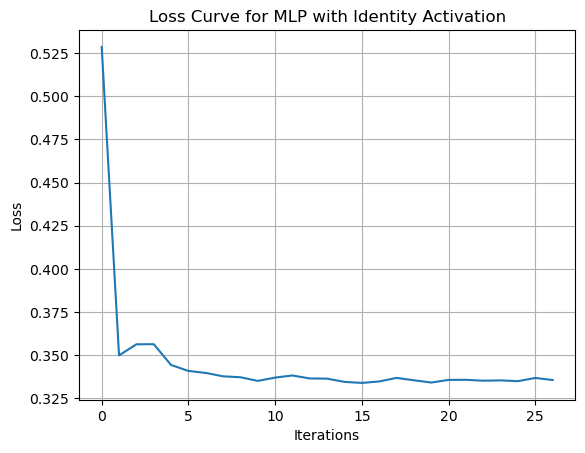

In [30]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt 

#TODO "early stopping" description

GN = 9                    # Group number (gn) as the random_state
# ACTIV_FUNC = 'logistic'   # Activation function for the MLP
ACTIV_FUNC = 'identity'
NUMBER_TRIALS = 50        # Optimization limit

# Create and split the dataset (feature matrix, target labels)
X, y = make_classification(n_samples=1000, n_features=20, random_state=GN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=GN)

# List to store results for CSV (for further use)
results = []

# Function used by Optuna to optimize hyperparameters
def objective(trial):
    # Define the hyperparameters range
    n_layers = trial.suggest_int('n_layers', 1, 5)  # Random between 1 and 5
    n_units = [trial.suggest_int(f'n_units_layer_{i}', 5, 200) for i in range(n_layers)]

    model = MLPClassifier(
        hidden_layer_sizes=n_units, 
        random_state=42,             # 0 is also a commonly used value too
        activation=ACTIV_FUNC,  
        max_iter=2000,               # The number of epochs
    )

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model (returns the mean accuracy)
    accuracy = model.score(X_test, y_test)

    # Store the results for CSV (for later representation)
    results.append({
        'n_layers': n_layers,
        'n_units_layer_0': n_units[0] if n_units else 0,  # Take first layer units (if it exists)
        'value': accuracy
    })

    return accuracy

# Set up the study and optimize
study = optuna.create_study(direction='maximize', study_name='MLP - optimizing number of layers and nodes')
study.optimize(objective, n_trials=NUMBER_TRIALS)

# Print the best parameters and accuracy
print("Best parameters:", study.best_params)
print("Best accuracy (from optimization):", study.best_value)

# Create a DataFrame from the results list and save it as a CSV
results_df = pd.DataFrame(results)
results_df.to_csv('optimization_results.csv', index=False)  # "False" because the index is not intended for this case
print("Results saved to 'optimization_results.csv'")

# Plotting the loss curve of the best model
# Create a new model with the best parameters for plotting loss curve
best_model = MLPClassifier(
    hidden_layer_sizes=[study.best_params['n_units_layer_0']] * study.best_params['n_layers'],  # Creating the same number of units for each layer
    random_state=42,
    activation=ACTIV_FUNC,
    max_iter=2000
)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Plot the loss curve
plt.plot(best_model.loss_curve_)
plt.title('Loss Curve for MLP with Identity Activation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

## Software - representing the best number of layers

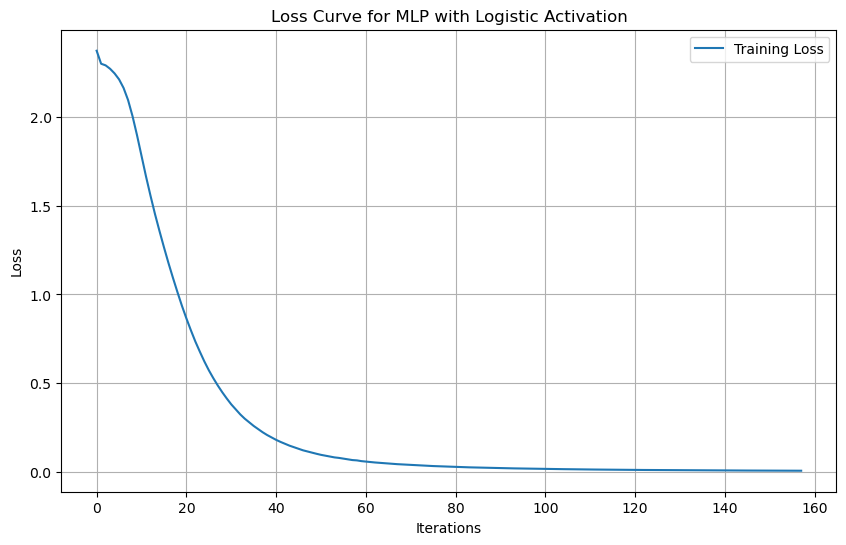

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

# Load your dataset (for example purposes, using the digits dataset)
# Replace this with your actual data loading method
dt = datasets.load_digits()
X, y = dt.data, dt.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

# Define the parameters for the model
NUMBER_LAYERS = 3  # Example: Number of hidden layers
UNITS_PER_LAYER = 100  # Example: Number of units per layer
ACTIV_FUNC = 'logistic'  # Example: Activation function

# Create an MLP model with the specified number of layers and units
model = MLPClassifier(
    hidden_layer_sizes=[UNITS_PER_LAYER] * NUMBER_LAYERS,  # Create layers with the same number of units
    random_state=42,
    activation=ACTIV_FUNC,
    max_iter=2000,
    solver='adam'  # You can choose 'adam', 'sgd', or others
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, label='Training Loss')
plt.title('Loss Curve for MLP with Logistic Activation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


# Howmework calculations confirmation

## Design matrix

In [22]:
import numpy as np

# Given observations and targets
x = np.array([-1, 1, -1.2, 1.4, 1.9])
t = np.array([-2, 3, -3, 0, -3])

# Step 1: Construct the design matrix Φ
Phi = np.column_stack((np.ones(x.shape[0]), x, x**2, x**3))

# Step 2: Compute the weights using the least squares method
# w = (Φ^T Φ)^(-1) Φ^T t
w = np.linalg.inv(Phi.T @ Phi) @ (Phi.T @ t)

# Output the results
print("Design Matrix (Φ):\n", Phi)
print("Polynomial Regression Weights (w):\n", w)


Design Matrix (Φ):
 [[ 1.    -1.     1.    -1.   ]
 [ 1.     1.     1.     1.   ]
 [ 1.    -1.2    1.44  -1.728]
 [ 1.     1.4    1.96   2.744]
 [ 1.     1.9    3.61   6.859]]
Polynomial Regression Weights (w):
 [ 3.02387284  2.26101046 -2.63029446 -0.14838515]


## Weights

In [8]:
import numpy as np

# Given observations (x) and targets (t)
x = np.array([-1, 1, -1.2, 1.4, 1.9])
t = np.array([-2, 3, -3, 0, -3])

# Step 1: Construct the design matrix Φ
# For polynomial regression of degree 3, we need to include x, x^2, and x^3
Phi = np.column_stack((np.ones(x.shape[0]), x, x**2, x**3))

# Display the design matrix
print("Design Matrix (Φ):")
print(Phi)

# Step 2: Compute the transpose of the design matrix
Phi_T = Phi.T

# Step 3: Compute Φ^T Φ
Phi_T_Phi = Phi_T @ Phi
print("\nΦ^T Φ:")
print(Phi_T_Phi)

# Step 4: Compute the inverse of Φ^T Φ
Phi_T_Phi_inv = np.linalg.inv(Phi_T_Phi)
print("\n(Φ^T Φ)^{-1}:")
print(Phi_T_Phi_inv)

# Step 5: Compute the pseudo-inverse of Φ
Phi_dagger = Phi_T_Phi_inv @ Phi_T
print("\nΦ^\dagger (Pseudo-inverse):")
print(Phi_dagger)

# Step 6: Calculate the weights using the target vector
w = Phi_dagger @ t

# Display the results
print("\nWeights (w):")
print(w)


Design Matrix (Φ):
[[ 1.    -1.     1.    -1.   ]
 [ 1.     1.     1.     1.   ]
 [ 1.    -1.2    1.44  -1.728]
 [ 1.     1.4    1.96   2.744]
 [ 1.     1.9    3.61   6.859]]

Φ^T Φ:
[[ 5.        2.1       9.01      7.875   ]
 [ 2.1       9.01      7.875    20.9473  ]
 [ 9.01      7.875    20.9473   27.65091 ]
 [ 7.875    20.9473   27.65091  59.561401]]

(Φ^T Φ)^{-1}:
[[ 5.70227083 -2.57484188 -4.35147072  2.17175428]
 [-2.57484188  1.98153792  2.15163725 -1.35533611]
 [-4.35147072  2.15163725  3.48654192 -1.79997808]
 [ 2.17175428 -1.35533611 -1.79997808  1.04193484]]

Φ^\dagger (Pseudo-inverse):
[[ 1.75388771  0.94771252 -1.22682816 -0.47209666 -0.00267541]
 [-1.04940644  0.20299718  0.48769105  0.69747794 -0.33875972]
 [-1.21658797 -0.51326963  1.19754707  0.55530376 -0.02299322]
 [ 0.68517748  0.05837494 -0.59427422 -0.39460409  0.24532589]]

Weights (w):
[ 3.02387284  2.26101046 -2.63029446 -0.14838515]


# Extra code (for the part 2)

In [17]:
import numpy as np

# Initialize input, weights, biases, and learning rate
x_0 = np.array([1, 1, 1, 1, 1])  # Input to the network
t = np.array([1, 0])  # Target output (one-hot encoded)
eta = 0.1  # Learning rate

# Custom weights and biases for the two layers
W1 = np.array([[0.1, 0.1, 0.1, 0.1, 0.1],  # Layer 1 weights (5 inputs to 3 hidden)
               [-1.0, -1.0, -1.0, -1.0, -1.0],
               [1.0, 1.0, 1.0, 1.0, 1.0]])

b1 = np.array(
    [
        [0.0],
        [0.0],  
        [0.0]
    ]
)  

W2 = np.array([[0.0, 0.0, 0.0],  
               [2.0, 0.0, 0.0]])

b2 = np.array(
    [
        [0.0],
        [0.0]
    ]
)  

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=0, keepdims=True)

def cross_entropy_loss(y, t):
    epsilon = 1e-12  # Small constant to avoid log(0)
    y = np.clip(y, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
    return -np.sum(t * np.log(y))

# Forward propagation
z1 = W1 @ x_0 + b1  # W1 (3, 5) @ x_0 (5,) + b1 (3,)
x_1 = relu(z1)

z2 = W2 @ x_1 + b2  # W2 (2, 3) @ x_1 (3,) + b2 (2,)
x_2 = softmax(z2)

# Loss calculation
loss = cross_entropy_loss(x_2, t)
print(f"Initial Loss: {loss}")

# Backward propagation
delta_2 = x_2 - t  # Output layer error

# Gradients for output layer
dW2 = np.outer(delta_2, x_1)  # Gradient for W2
db2 = delta_2  # Gradient for b2

# Error propagated to hidden layer
delta_1 = (W2.T @ delta_2) * relu_derivative(z1)  # Shape (3,)

# Gradients for hidden layer
dW1 = np.outer(delta_1, x_0)  # Gradient for W1
db1 = delta_1  # Gradient for b1

# Update weights and biases for both layers
W2 -= eta * dW2
b2 -= eta * db2

W1 -= eta * dW1
b1 -= eta * db1

# Forward pass after the update
z1_updated = W1 @ x_0 + b1  # Forward pass after update
x_1_updated = relu(z1_updated)

z2_updated = W2 @ x_1_updated + b2
x_2_updated = softmax(z2_updated)

# New loss after update
updated_loss = cross_entropy_loss(x_2_updated, t)
print(f"Updated Loss: {updated_loss}")

# Print final weights and biases
print("Updated W1:")
print(W1)
print("Updated b1:")
print(b1)
print("Updated W2:")
print(W2)
print("Updated b2:")
print(b2)


ValueError: operands could not be broadcast together with shapes (2,) (2,3) 